In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df_1500_tiling = pd.read_csv('./results_1500_paralelo_tiling.csv')
df_1500 = pd.read_csv('./results_1500_paralelo.csv')
df_1000_tiling = pd.read_csv('./results_1000_paralelo_tiling.csv')
df_1000 = pd.read_csv('./results_1000_paralelo.csv')
df_400_tiling = pd.read_csv('./results_400_paralelo_tiling.csv')
df_400 = pd.read_csv('./results_400_paralelo.csv')

In [6]:
df_1500.head()



num_threads  run  real_time
0            1    1      16.82
1            1    2      16.45
2            1    3      16.82
3            1    4      15.10
4            1    5      15.50

In [7]:
# Compute grouped statistics

grouped_1500 = df_1500.groupby('num_threads')['real_time'].agg(['mean', 'std']).reset_index()
grouped_1500_tiling = df_1500_tiling.groupby('num_threads')['real_time'].agg(['mean', 'std']).reset_index()




grouped_1000 = df_1000.groupby('num_threads')['real_time'].agg(['mean', 'std']).reset_index()
grouped_1000_tiling = df_1000_tiling.groupby('num_threads')['real_time'].agg(['mean', 'std']).reset_index()


grouped_400_tiling = df_400_tiling.groupby('num_threads')['real_time'].agg(['mean', 'std']).reset_index()

grouped_400 = df_400.groupby('num_threads')['real_time'].agg(['mean', 'std']).reset_index()

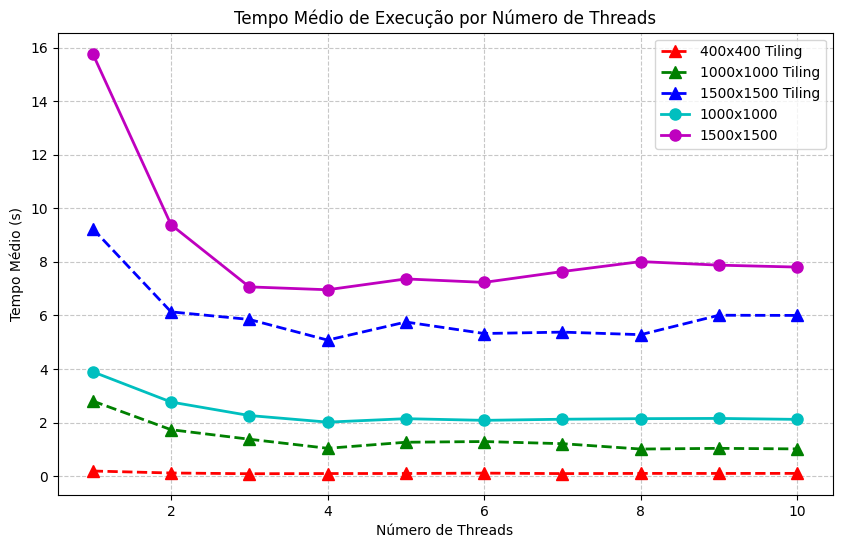

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(grouped_400_tiling['num_threads'], grouped_400_tiling['mean'], 'r--', linewidth=2, markersize=8, marker='^', label='400x400 Tiling')
plt.plot(grouped_1000_tiling['num_threads'], grouped_1000_tiling['mean'], 'g--', linewidth=2, markersize=8, marker='^', label='1000x1000 Tiling')
plt.plot(grouped_1500_tiling['num_threads'], grouped_1500_tiling['mean'], 'b--', linewidth=2, markersize=8, marker='^', label='1500x1500 Tiling')
plt.plot(grouped_1000['num_threads'], grouped_1000['mean'], 'co-', linewidth=2, markersize=8, label='1000x1000')
plt.plot(grouped_1500['num_threads'], grouped_1500['mean'], 'mo-', linewidth=2, markersize=8, label='1500x1500')
plt.legend()
plt.xlabel('Número de Threads')
plt.ylabel('Tempo Médio (s)')
plt.title('Tempo Médio de Execução por Número de Threads')
plt.grid(True, linestyle='--', alpha=0.7)


In [ ]:
# primnt summary side by side of each throud count for both methods

# Create summary tables for each matrix size and method
print("\n=== 400x400 Matrix ===")
print("\nTiling Method:")
print(grouped_400_tiling.to_string(index=False))
print("\nStandard Method:")
print(grouped_400.to_string(index=False))

print("\n=== 1000x1000 Matrix ===")
print("\nTiling Method:")
print(grouped_1000_tiling.to_string(index=False))
print("\nStandard Method:")
print(grouped_1000.to_string(index=False))

print("\n=== 1500x1500 Matrix ===")
print("\nTiling Method:")
print(grouped_1500_tiling.to_string(index=False))
print("\nStandard Method:")
print(grouped_1500.to_string(index=False))


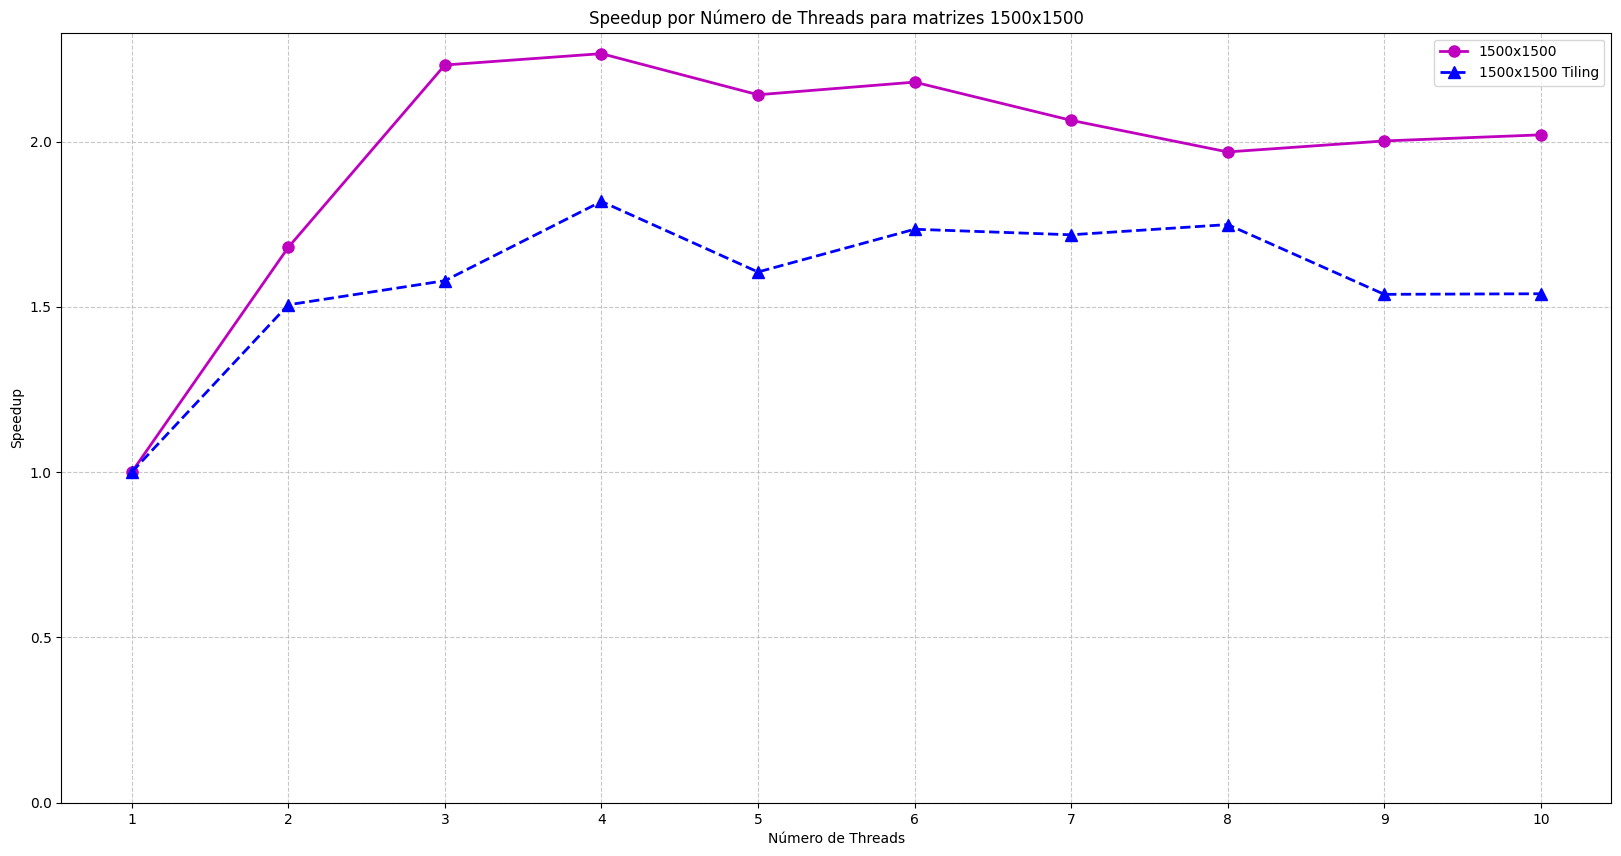

In [13]:
## now compute the speedup 

# Calculate speedup for each matrix size
speedup_400_tiling = grouped_400_tiling['mean'].iloc[0] / grouped_400_tiling['mean']
speedup_1000_tiling = grouped_1000_tiling['mean'].iloc[0] / grouped_1000_tiling['mean']
speedup_1500_tiling = grouped_1500_tiling['mean'].iloc[0] / grouped_1500_tiling['mean']
speedup_400 = grouped_400['mean'].iloc[0] / grouped_400['mean']
speedup_1000 = grouped_1000['mean'].iloc[0] / grouped_1000['mean']
speedup_1500 = grouped_1500['mean'].iloc[0] / grouped_1500['mean']

# Create speedup dataframe
speedup_df = pd.DataFrame({
    'num_threads': grouped_400_tiling['num_threads'],
    '400x400': speedup_400,
    '1000x1000': speedup_1000,
    '1500x1500': speedup_1500,
    '400x400_tiling': speedup_400_tiling,
    '1000x1000_tiling': speedup_1000_tiling,
    '1500x1500_tiling': speedup_1500_tiling
})

# and plot the speedup

plt.figure(figsize=(20, 10))
plt.plot(speedup_df['num_threads'], speedup_df['1500x1500'], 'mo-', linewidth=2, markersize=8, label='1500x1500')
plt.plot(speedup_df['num_threads'], speedup_df['1500x1500_tiling'], 'b--', marker='^', linewidth=2, markersize=8, label='1500x1500 Tiling')
plt.legend()
plt.xlabel('Número de Threads')
plt.ylabel('Speedup')
plt.title('Speedup por Número de Threads para matrizes 1500x1500')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(speedup_df['num_threads'])
plt.ylim(bottom=0)  # Faz o eixo y começar em zero
plt.show()





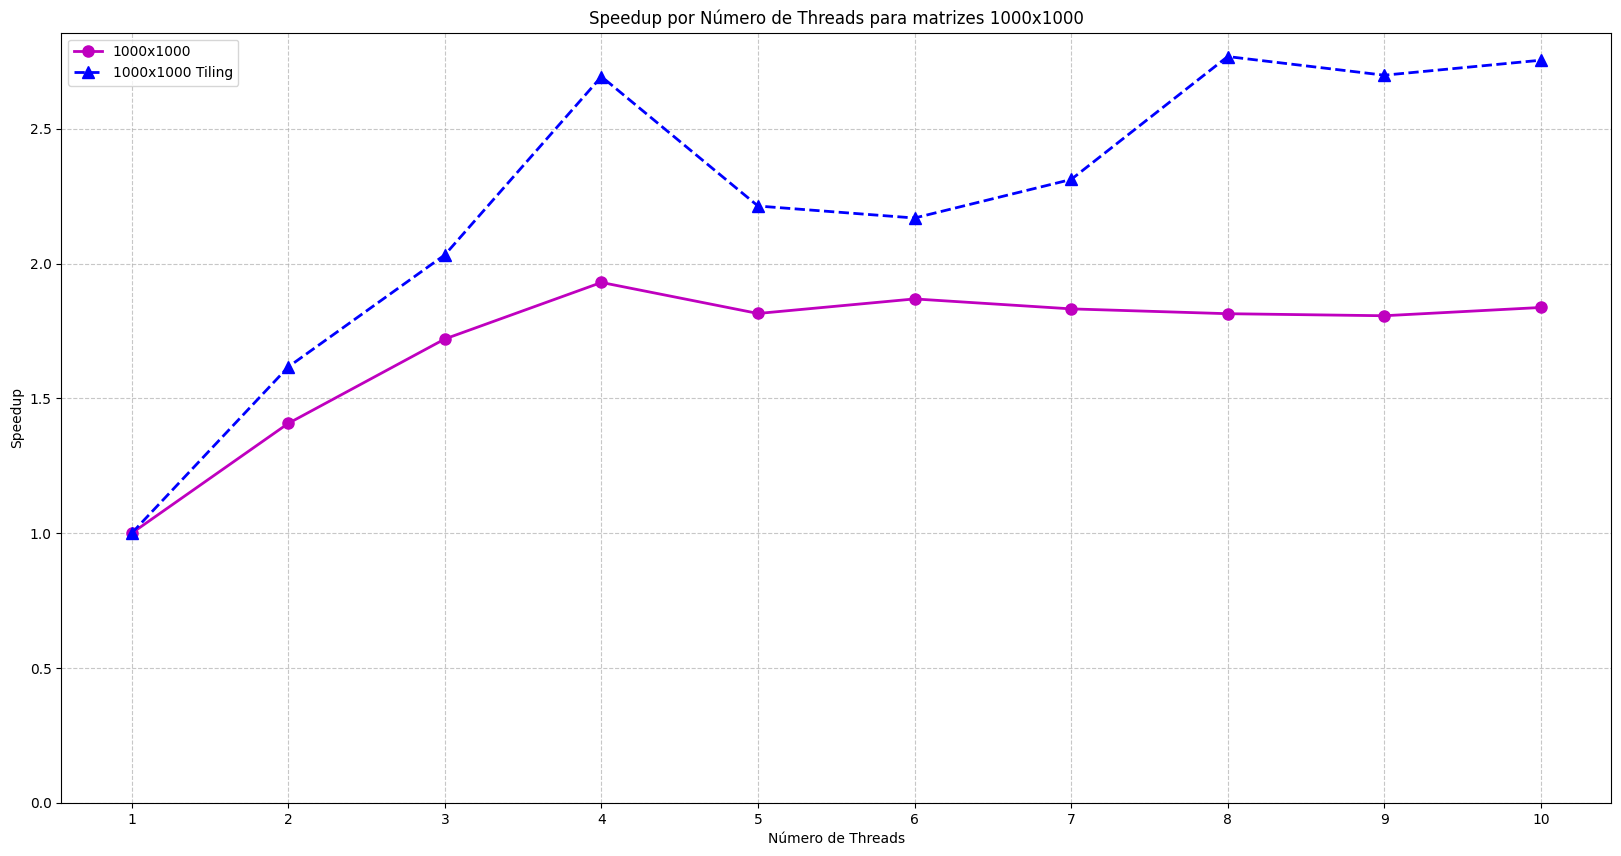

In [14]:
## for 1000x1000

plt.figure(figsize=(20, 10))
plt.plot(speedup_df['num_threads'], speedup_df['1000x1000'], 'mo-', linewidth=2, markersize=8, label='1000x1000')
plt.plot(speedup_df['num_threads'], speedup_df['1000x1000_tiling'], 'b--', marker='^', linewidth=2, markersize=8, label='1000x1000 Tiling')
plt.legend()
plt.xlabel('Número de Threads')
plt.ylabel('Speedup')
plt.title('Speedup por Número de Threads para matrizes 1000x1000')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(speedup_df['num_threads'])
plt.ylim(bottom=0)  # Faz o eixo y começar em zero
plt.show()


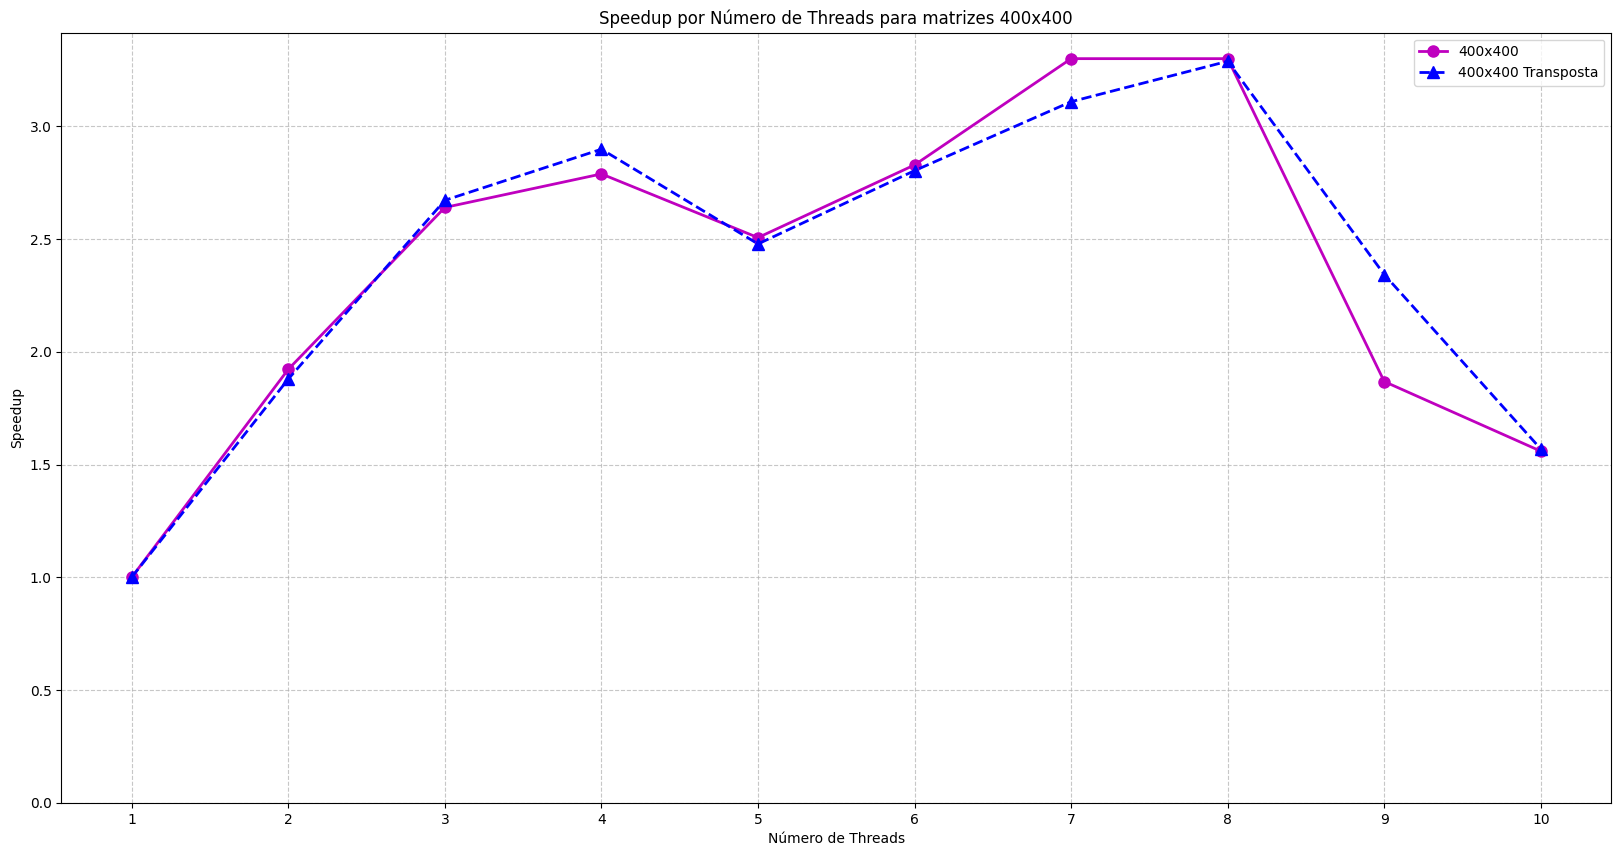

In [17]:
# for 400x400

plt.figure(figsize=(20, 10))
plt.plot(speedup_df['num_threads'], speedup_df['400x400'], 'mo-', linewidth=2, markersize=8, label='400x400')
plt.plot(speedup_df['num_threads'], speedup_df['400x400_transposta'], 'b--', marker='^', linewidth=2, markersize=8, label='400x400 Transposta')
plt.legend()
plt.xlabel('Número de Threads') 
plt.ylabel('Speedup')
plt.title('Speedup por Número de Threads para matrizes 400x400')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(speedup_df['num_threads'])
plt.ylim(bottom=0)  # Faz o eixo y começar em zero
plt.show()
